## Studing the $M_{desc}$-vs-$M_{tomp}$ relation :

In [81]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import importlib
plt.style.use('./Notebook.mystyle')
data_dir = '/run/media/mahdi/HD2/Lya/LyTomo_data_new/'

Write the random lmap and peaks to get the descendants for. \
**Note:** If you have downloaded the `LyTomo_data/watersheds*`, you can skip the next cell

In [44]:
def write_random_fields(z, th, lc):    
    from lytomo_watershed import minima
    importlib.reload(minima)
    for n in range(1,21):
        lmap_mock = h5py.File(os.path.join(data_dir, 'watersheds_z'+str(z)+'/mocks/n'+str(n)
                                           +'/labeled_map_TNG_z'+str(z)+'_n'+str(n)
                                           +'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')
                                           +'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5'),'r')['map'][:]
        peaks_mock = h5py.File(os.path.join(data_dir, 'watersheds_z'+str(z)+'/mocks/n'
                                            +str(n)+'/peaks_TNG_z'+str(z)+'_n'+str(n)
                                            +'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')
                                            +'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5'), 'r')
        minima.displace_randomly(lmap=lmap_mock, peaks = peaks_mock, save_lmap=os.path.join(data_dir,'watersheds_z'
                                                                                            +str(z)+'/mocks/n'+str(n)+'/labeled_map_TNG_z2.4_n'+str(n)
                                                                                            +'_sigma4_th2.35_lc2.00_rnd.hdf5'), 
                                 save_peaks=os.path.join(data_dir,'watersheds_z'+str(z)+'/mocks/n'
                                                         +str(n)+'/peaks_TNG_z2.4_n'+str(n)
                                                         +'_sigma4_th2.35_lc2.00_rnd.hdf5'),seed=125)

In [45]:
write_random_fields(z=2.4, th=2.35, lc=2.00)

displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]
displace vector : [189 157  87]


Now refer to the [cook book](https://github.com/mahdiqezlou/LyTomo-Watershed/blob/main/CookBook.ipynb), the section "connection to z=0" to find the descendants of these random fields. 

These are some plotting helper functions:

## z=2.4 and $\sigma = 4$:

In [114]:
def plot_for_Mtomo_Mdesc_sigma4(z, savefig=None):
    from lytomo_watershed import plot
    importlib.reload(plot)
    masses = plot.Mtomo_Mdesc(data_dir=data_dir)
    
    # definitions for the axes
    left, width = 0.3, 0.5
    bottom, height = 0.3, 0.57

    rect_scatter = [left, bottom, width, height]
    rect_err = [left, bottom - 0.15 ,width, 0.15]
    rect_histx = [left, bottom + height, width, 0.07]
    rect_histy = [left + width , bottom, 0.15, height]

    # start with a square Figure
    fig_mock = plt.figure(figsize=(15, 18))
    #fig_rand, ax_rand = plt.subplots(1,1,figsize=(10,10))

    ax_err_mock = fig_mock.add_axes(rect_err)
    ax = fig_mock.add_axes(rect_scatter, sharex=ax_err_mock)
    ax_histx = fig_mock.add_axes(rect_histx, sharex=ax)
    ax_histy = fig_mock.add_axes(rect_histy, sharey=ax)

    masses.scatter_hist(n=1, fig=fig_mock, ax=ax, ax_histx=ax_histx, ax_histy=ax_histy,
                         ax_err = ax_err_mock, ax_err_label='Mock', offset=0.142,
                         plot_kde=True, z=z, sigma='4', bin_size=0.5)
    plt.tight_layout()
    if savefig is not None:
        fig_mock.savefig(savefig, transparent=False)

Number of watersheds in mock =  225
Number of watersheds in noiseless =  184
Slope :  0.716+-0.089
The prefactor :  13.71+-0.058
Reading the random watersheds


/run/media/mahdi/HD2/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


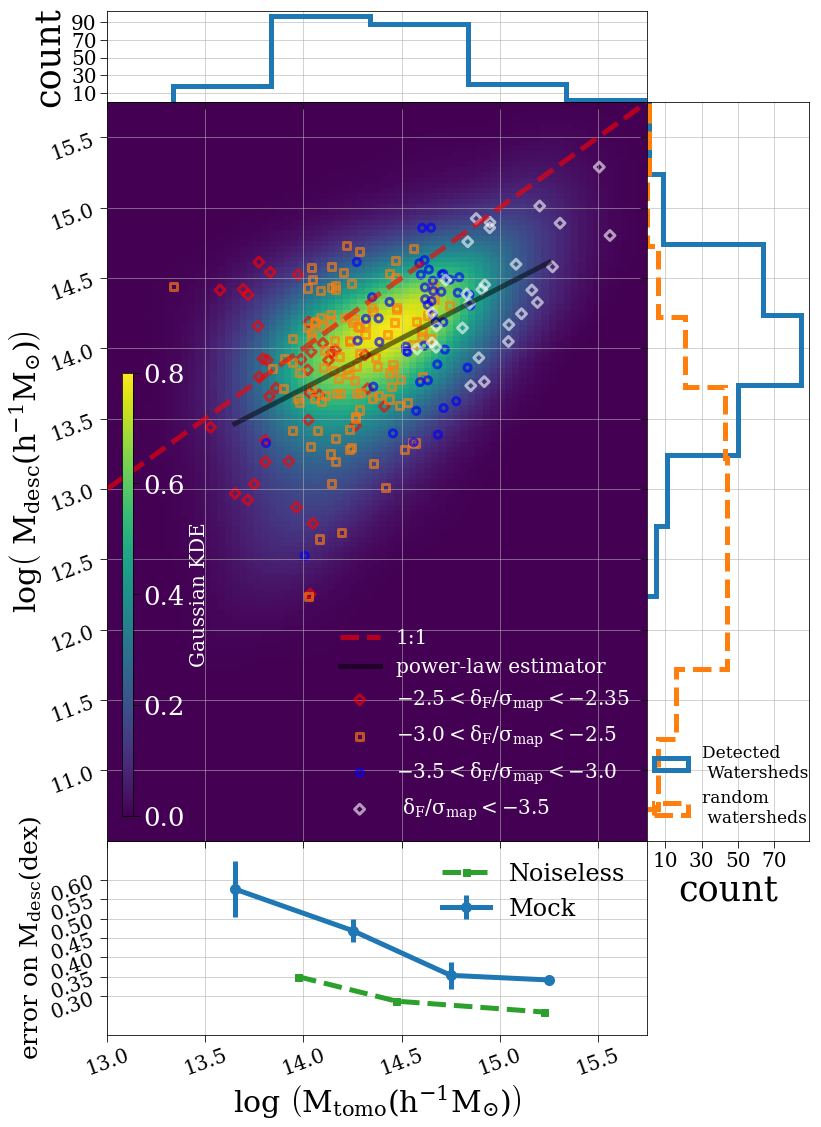

In [115]:
plot_for_Mtomo_Mdesc_sigma4(z=2.4, savefig='../figures/M0_Mtomo_scatter_sigma4.pdf')    

## z=2.4 and $\sigma = 2$:

In [165]:
def plot_for_Mtomo_Mdesc_sigma4(z, savefig=None):
    from lytomo_watershed import plot
    importlib.reload(plot)
    masses = plot.Mtomo_Mdesc(data_dir=data_dir)
    _, _, lmap4 = masses.read_files(n=1,z='2.4', sigma='4', th='2.35', lc= '2.00', noiseless=False, random=False)
    _, _, lmap2 = masses.read_files(n=1,z='2.4', sigma='2', th='2.75', lc='2.30', noiseless=False, random=False)
    
    # definitions for the axes
    left, width = 0.3, 0.5
    bottom, height = 0.3, 0.57

    rect_scatter = [left, bottom, width, height]
    rect_err = [left, bottom - 0.15 ,width, 0.15]
    rect_histx = [left, bottom + height, width, 0.07]
    rect_histy = [left + width , bottom, 0.15, height]

    # start with a square Figure
    fig_mock = plt.figure(figsize=(15, 18))
    #fig_rand, ax_rand = plt.subplots(1,1,figsize=(10,10))

    ax_err_mock = fig_mock.add_axes(rect_err)
    ax = fig_mock.add_axes(rect_scatter, sharex=ax_err_mock)
    ax_histx = fig_mock.add_axes(rect_histx, sharex=ax)
    ax_histy = fig_mock.add_axes(rect_histy, sharey=ax)

    masses.scatter_hist(n=1, fig=fig_mock, ax=ax, ax_histx=ax_histx, ax_histy=ax_histy,
                        ax_err = ax_err_mock, ax_err_label='Mock', offset=0.142,
                        plot_kde=True, z=z, sigma='2', th='2.75', lc='2.30', bin_size=0.5, 
                        lmap2=lmap2, lmap4=lmap4)
    plt.tight_layout()
    if savefig is not None:
        fig_mock.savefig(savefig, transparent=False)

Number of watersheds in mock =  639
Number of watersheds in noiseless =  862
Slope :  1.103+-0.064
The prefactor :  13.73+-0.024


/run/media/mahdi/HD2/package_dev/LyTomo_Watershed/src/lytomo_watershed/plot.py:324: RuntimeWarning: invalid value encountered in double_scalars
  err.append(np.sqrt(np.sum(dev*dev)/dev.size))
/run/media/mahdi/HD2/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


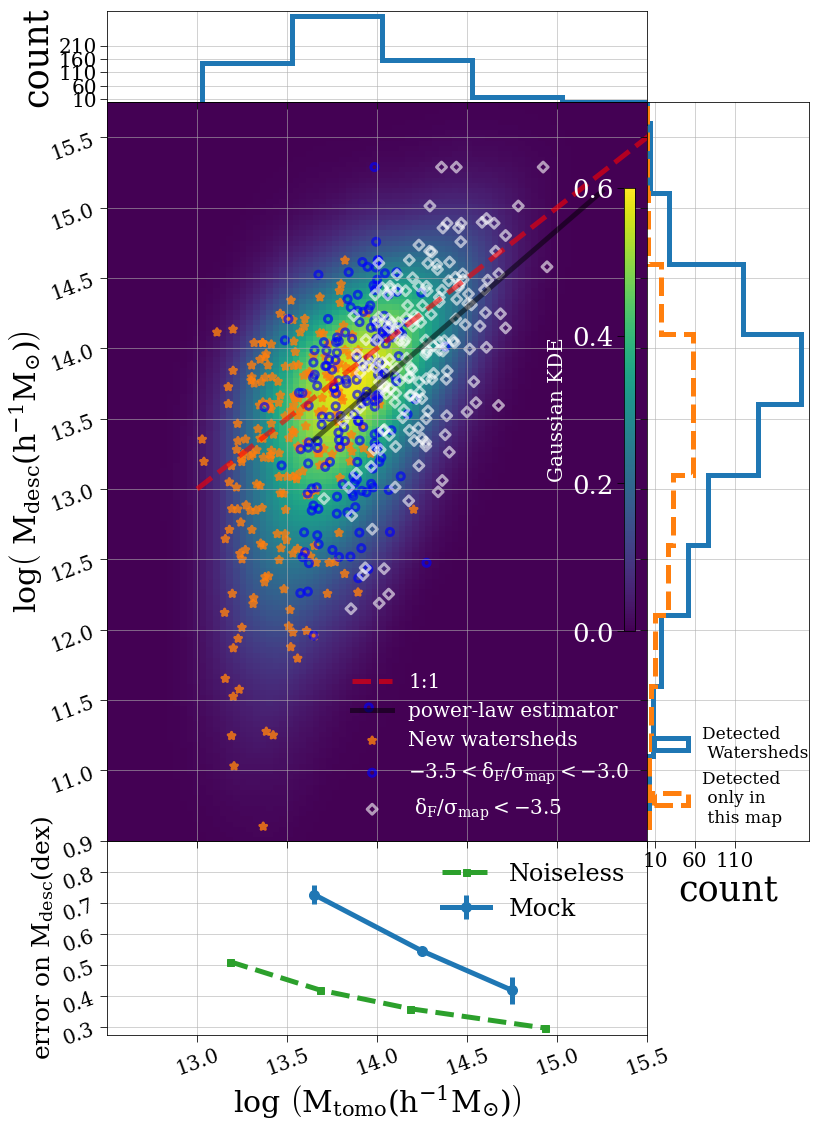

In [168]:
plot_for_Mtomo_Mdesc_sigma4(z=2.4, savefig='../figures/M0_Mtomo_scatter_sigma2.pdf')    

In [196]:
def get_mean_err_sigma2_sigma4(nmocks=20,  co_sig2=[0.72, 13.8], co_sig4=(1.11,13.9)):
    
    bins = np.array([13,13.5,14,14.5,15,15.5,16])
    mbins = np.array([(bins[b]+bins[b+1])/2 for b in range(bins.size-1)])
    dev_bins_all = [np.empty((nmocks, mbins.size)), np.empty((nmocks, mbins.size))]
    print(dev_bins_all[0].shape)
    
    for i, n in enumerate(np.arange(1, nmocks+1)):
        fdesc2, peaks2 = read_files(n=n, z=2.4, sigma='2', th='2.75', lc='2.30')
        fdesc4, peaks4 = read_files(n=n, z=2.4, sigma='4', th='2.35', lc='2.00')
        ind2 = fdesc2['peak_id'][:].astype(int)-1
        ind4 = fdesc4['peak_id'][:].astype(int)-1
        Mtomo = [peaks2['mtomo'][:][ind2], peaks4['mtomo'][:][ind4]] 
        GroupMass = [10+np.log10(fdesc2['GroupMass'][:]), 
                     10+np.log10(fdesc4['GroupMass'][:])]
        Mdesc_est = lambda x, p : (x-14)*p[0] +p[1]
        GroupMassFit = [ Mdesc_est(Mtomo[0], co_sig2),
                        Mdesc_est(Mtomo[1], co_sig4)]
        
        for j in range(2):
            dev = GroupMass[j] - GroupMassFit[j]
            for b in range(bins.size-1):
                indp = np.where((GroupMassFit[j]<bins[b+1])
                                *(GroupMassFit[j] > bins[b]))[0].astype(int)
                dev_bins = np.sqrt(np.dot(dev[indp],dev[indp])
                                   /indp.size)
                #print(j,i,b)
                dev_bins_all[j][i,b] =  dev_bins
            
    return np.median(dev_bins_all[0], axis=0), np.median(dev_bins_all[1], axis=0), \
np.std(dev_bins_all[0], axis=0), np.std(dev_bins_all[1], axis=0), mbins, bins
    
def plot_uncertainty_M0_paper_sigma(ax):
    plt.style.use('Notebook.mystyle')
    plt.rc('font', family='Serif')
    sigma = [2, 4]
    color = ['C1','C2']
    ls = [('solid','dotted'), ('dashed', '-.')]
    
    
    dev_bins2, dev_bins4, std2, std4, mbins, bins = get_mean_err_sigma2_sigma4()
    ind = np.where(dev_bins2 != np.nan)
    ax.errorbar(mbins[ind], dev_bins2[ind], yerr=std2[ind], marker='o', label='$\sigma = 2$',
                ls='solid', alpha=0.7, capsize=8, capthick=3)
    ind = np.where(dev_bins4 != np.nan)
    ax.errorbar(mbins[ind], dev_bins4[ind], yerr=std4[ind], marker='o', label='$\sigma = 4$',
                ls='dotted', alpha=0.7, capsize=8, capthick=3)
    ax.set_xlabel(r'$\mathrm{log[\ M_{desc}^{est} (h^{-1} M_{\odot})] }$', fontsize=30)
    ax.set_ylabel('RMS error on '+r'$\mathrm{M_{desc} \ (dex)}$', fontsize=34)
    ax.legend(fontsize=30, frameon=False)
    ax.set_xlim(13,15)
    ax.set_ylim(0, 1)
    plt.setp(ax.get_xticklabels(), rotation=20, fontsize=30)
    plt.setp(ax.get_yticklabels(), fontsize=30)
    plt.grid(True)


In [191]:
get_mean_err_sigma2_sigma4()

(20, 6)


<ipython-input-190-5f601419ba3d>:25: RuntimeWarning: invalid value encountered in double_scalars
  dev_bins = np.sqrt(np.dot(dev[indp],dev[indp])


(array([0.73828346, 0.60308137, 0.60137744,        nan,        nan,
               nan]),
 array([0.66302085, 0.50693335, 0.44038572, 0.47114363, 0.49205018,
               nan]),
 array([0.03280915, 0.01812896, 0.08438867,        nan,        nan,
               nan]),
 array([0.08391067, 0.03828187, 0.04125264, 0.04189028, 0.09174541,
               nan]),
 array([13.25, 13.75, 14.25, 14.75, 15.25, 15.75]),
 array([13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ]))

(20, 6)


<ipython-input-190-5f601419ba3d>:25: RuntimeWarning: invalid value encountered in double_scalars
  dev_bins = np.sqrt(np.dot(dev[indp],dev[indp])


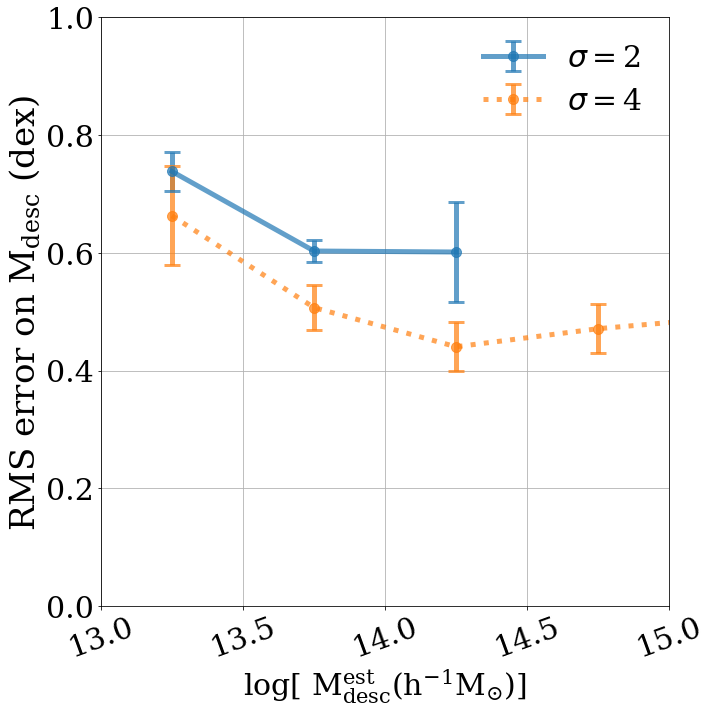

In [192]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plot_uncertainty_M0_paper_sigma(ax)
plt.tight_layout()
plt.savefig('./figures/M0_Mtomo_sigma_err_M0fit.pdf',transparent=True)

## z=2.3:

if we use $\delta_F$-vs-$\rho_{DM}$ for that particular redshift.

Number of watersheds =  189
Number of watersheds =  189
Slope :  0.759+-0.092
The prefactor :  13.74+-0.051


<ipython-input-183-36fd3a7baae0>:87: RuntimeWarning: invalid value encountered in double_scalars
  err.append(np.sqrt(np.sum(dev*dev)/dev.size))
<ipython-input-199-98b2e633e89f>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


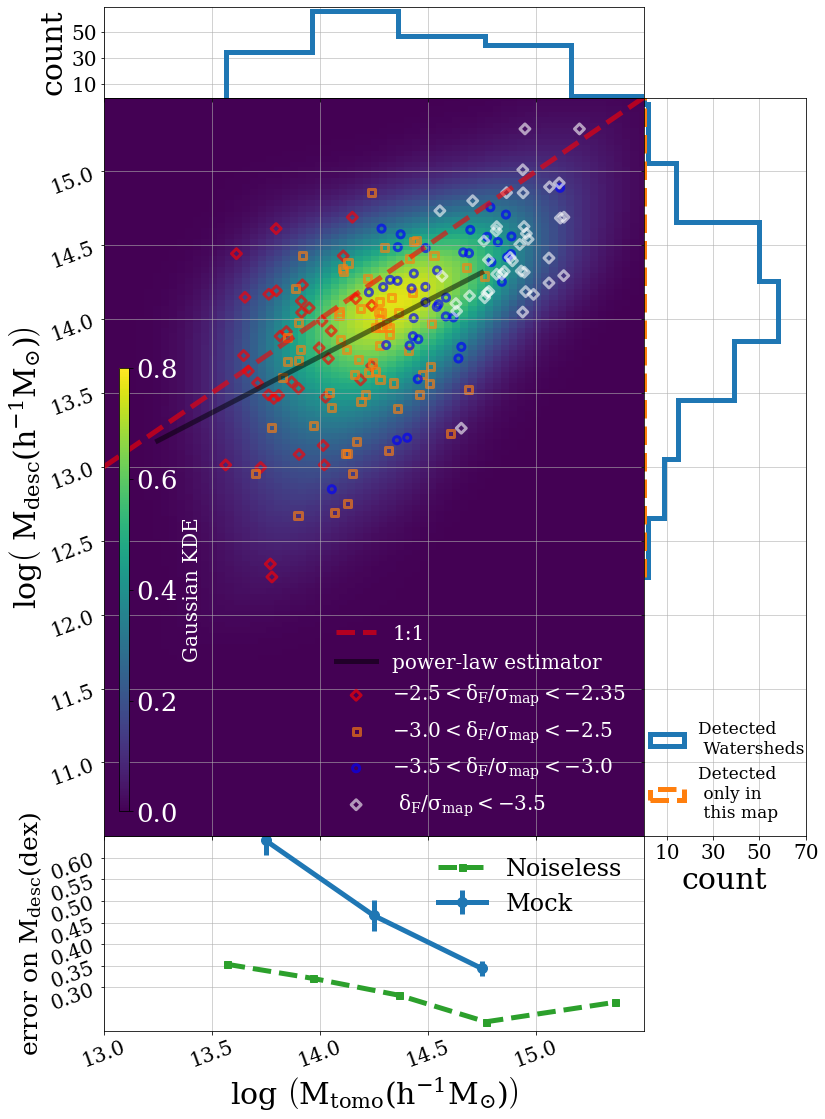

In [199]:
# definitions for the axes
left, width = 0.3, 0.5
bottom, height = 0.3, 0.57

rect_scatter = [left, bottom, width, height]
rect_err = [left, bottom - 0.15 ,width, 0.15]
rect_histx = [left, bottom + height, width, 0.07]
rect_histy = [left + width , bottom, 0.15, height]

# start with a square Figure
fig_mock = plt.figure(figsize=(15, 18))
#fig_rand, ax_rand = plt.subplots(1,1,figsize=(10,10))

ax_err_mock = fig_mock.add_axes(rect_err)
ax = fig_mock.add_axes(rect_scatter, sharex=ax_err_mock)
ax_histx = fig_mock.add_axes(rect_histx, sharex=ax)
ax_histy = fig_mock.add_axes(rect_histy, sharey=ax)

scatter_hist(n=1, fig=fig_mock, ax=ax, ax_histx=ax_histx, ax_histy=ax_histy,
             ax_err = ax_err_mock, ax_err_label='Mock', offset=0.114,
             conversion_not_adjusted=False, plot_kde=True, z=2.3, sigma='4',
             th='2.35', lc='2.00', bins_err=np.array([13,13.5,14,14.5,15]))
plt.tight_layout()
#fig_mock.savefig('M0_Mtomo_scatter_sigma4.pdf', transparent=True)

if we use $\delta_F$-vs-$\rho_{DM}$ for z=2.4

Number of watersheds =  189
Number of watersheds =  189
Slope :  0.761+-0.093
The prefactor :  13.76+-0.049


<ipython-input-183-36fd3a7baae0>:87: RuntimeWarning: invalid value encountered in double_scalars
  err.append(np.sqrt(np.sum(dev*dev)/dev.size))
<ipython-input-200-4a0ca2623e74>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-200-4a0ca2623e74>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


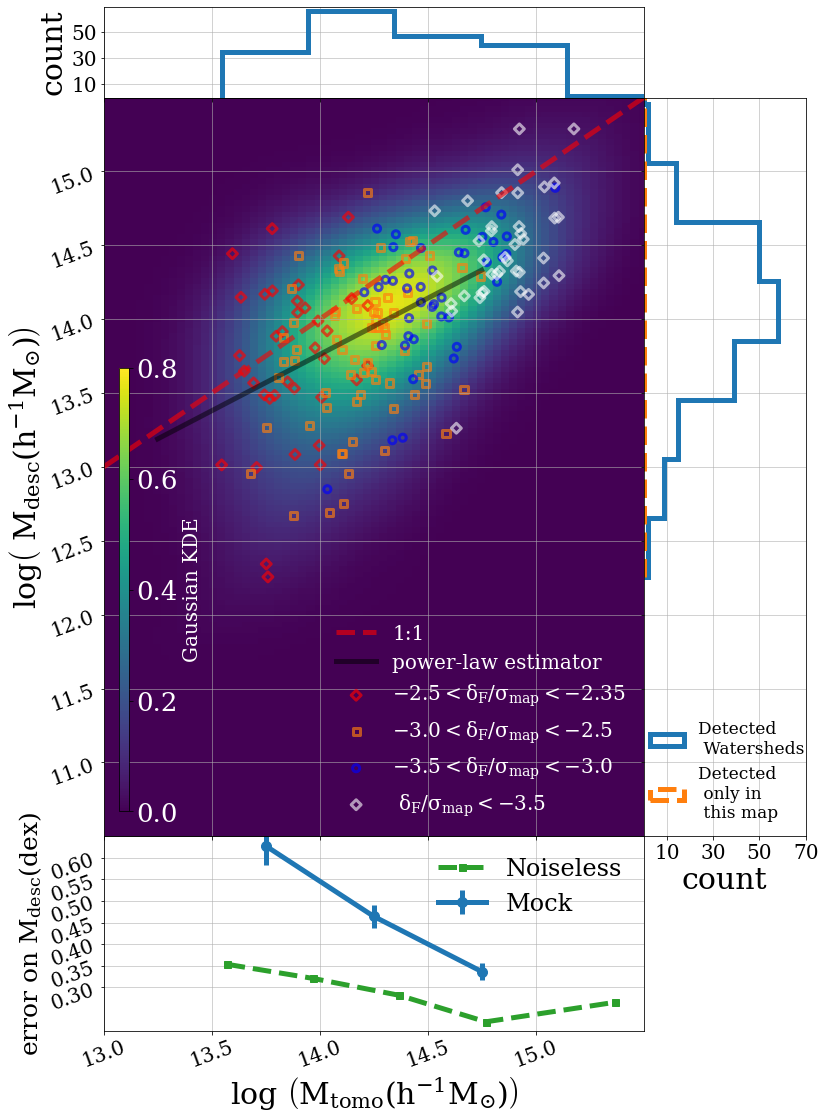

In [200]:
# definitions for the axes
left, width = 0.3, 0.5
bottom, height = 0.3, 0.57

rect_scatter = [left, bottom, width, height]
rect_err = [left, bottom - 0.15 ,width, 0.15]
rect_histx = [left, bottom + height, width, 0.07]
rect_histy = [left + width , bottom, 0.15, height]

# start with a square Figure
fig_mock = plt.figure(figsize=(15, 18))
#fig_rand, ax_rand = plt.subplots(1,1,figsize=(10,10))

ax_err_mock = fig_mock.add_axes(rect_err)
ax = fig_mock.add_axes(rect_scatter, sharex=ax_err_mock)
ax_histx = fig_mock.add_axes(rect_histx, sharex=ax)
ax_histy = fig_mock.add_axes(rect_histy, sharey=ax)

scatter_hist(n=1, fig=fig_mock, ax=ax, ax_histx=ax_histx, ax_histy=ax_histy,
             ax_err = ax_err_mock, ax_err_label='Mock', offset=0.114,
             conversion_not_adjusted=True, plot_kde=True, z=2.3, sigma='4',
             th='2.35', lc='2.00', bins_err=np.array([13,13.5,14,14.5,15]))
plt.tight_layout()
plt.tight_layout()
#fig_mock.savefig('M0_Mtomo_scatter_sigma4.pdf', transparent=True)

In [131]:
def test():
    x = np.linspace(0,40,40)
    y = np.linspace(0,50,50)
    X, Y = np.mgrid[0:50:50j, 0:40:40j]
    print(X.shape, Y.shape)
    X, Y = np.meshgrid(x,y)
    print(X.shape, Y.shape)
    
test()

(50, 40) (50, 40)
(50, 40) (50, 40)


## z=2.6:

if we use $\delta_F$-vs-$\rho_{DM}$ at z=2.45 :

Number of watersheds in mock =  212
Number of watersheds in noiseless =  177
Slope :  0.763+-0.084
The prefactor :  13.70+-0.047


/run/media/mahdi/HD2/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


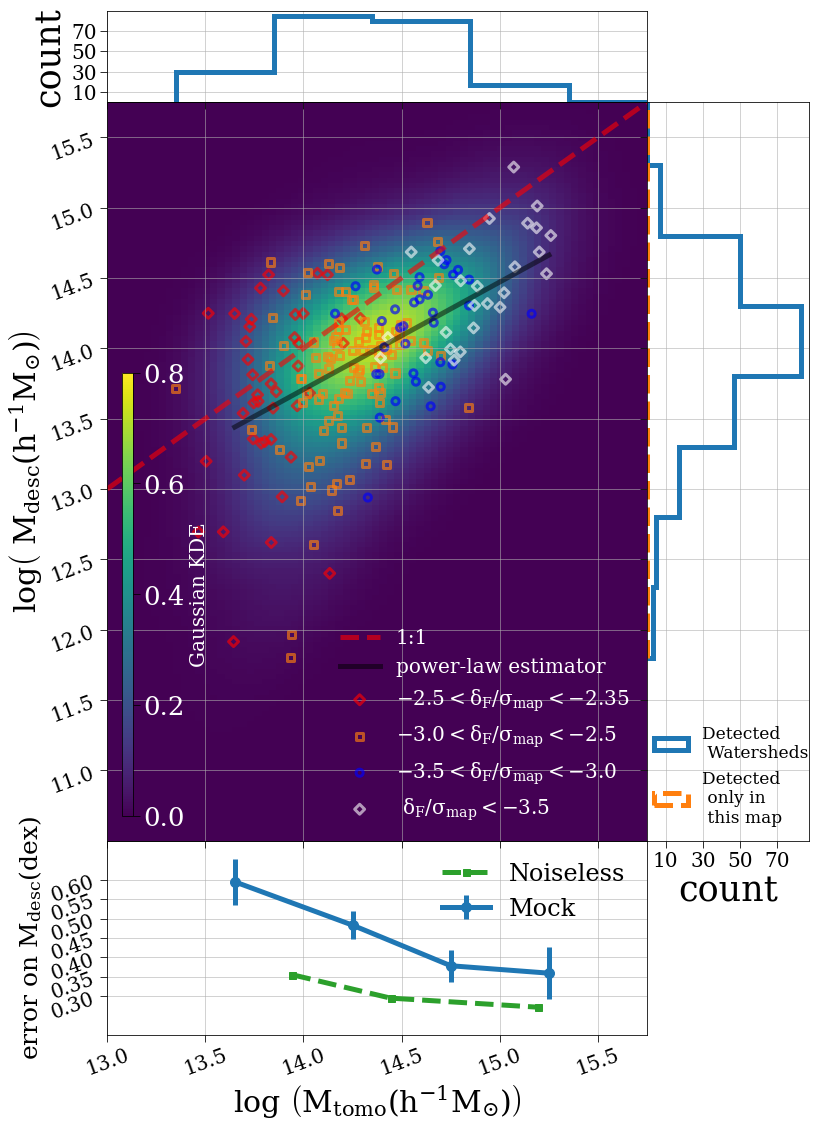

In [116]:
plot_for_Mtomo_Mdesc_sigma4(z=2.6)

Summarizing the redshift differences :

1. Errors in the mass bins are the same.

2. The slopes and intercepts match within the uncertainties. 

|z | # Watersheds | slope | intercept |
|--|--|--| --|
|2.3| --  | 0.76 +-0.09 | 13.74+-0.06|
|2.4| -- | 0.72+-0.09 | 13.76+-0.05|
|2.6| -- | 0.77+-0.09 | 13.70+-0.05|

3. It does not matter whether we use $\delta_F$-vs-$\rho_{DM}$ relation at the midpoint redshift or adjust it for each redshift bin.


So, we conclude if we use same watershed parameters (i.e. $\kappa$  and $\nu$ ) and same $\delta_F$-vs-$\rho_{DM}$ estimator for the full observed LATIS map, the estimators provided for the DM mass within the watersheds (studies in [this notebook](https://github.com/mahdiqezlou/LyTomo-Watershed/blob/main/MDM_Mtomo.ipynb)) and $M_{desc}$ are not chaning with redshift. This makes life much easier when applying to the observed map!